In [1]:
import pandas as pd


In [5]:
#load dataset
diabetes =pd.read_csv("diabetes.csv")
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
#we are using lambda function to normalize our data
#diabetes.columns 
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
        'DiabetesPedigreeFunction']
diabetes[cols]= diabetes [cols].apply(lambda x:(x -x.min()) / (x.max() -x.min()))
diabetes.head()                                                              

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [25]:
#import tensor flow
import tensorflow as tf

In [33]:
n_preg = tf.feature_column.numeric_column('Pregnancies')
n_glu =  tf.feature_column.numeric_column('Glucose')
n_Blood = tf.feature_column.numeric_column('BloodPressure')
n_Skin = tf.feature_column.numeric_column('SkinThickness')
n_Insulin = tf.feature_column.numeric_column('Insulin')
n_BMI = tf.feature_column.numeric_column('BMI')
n_DPF = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
n_AGE = tf.feature_column.numeric_column('AGE')





In [39]:
import tensorflow as tf

assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group', vocabulary_list=['A', 'B', 'C', 'D']
)


<Axes: >

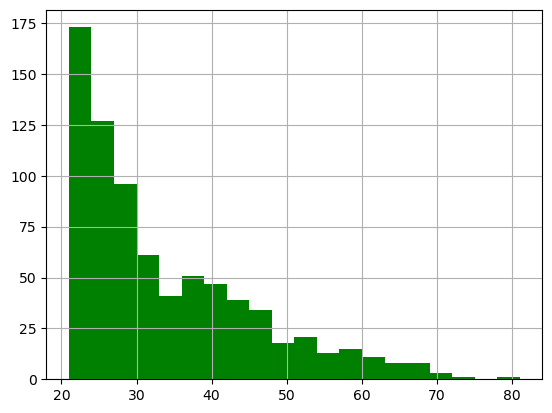

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20,color = 'g')

In [61]:
age_buckets = tf.feature_column.bucketized_column(n_AGE, boundaries=[20,30,40,50,60,70,80])
feat_col = [n_preg,n_glu,n_Blood,n_Skin,n_Insulin,n_BMI,n_DPF,assigned_group,age_buckets]

In [85]:
x_data =diabetes.drop('Outcome',axis=1)
labels = diabetes['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [109]:
import tensorflow as tf
from tensorflow.compat.v1 import estimator as tf_estimator

# Define feature columns
feat_col = [tf.feature_column.numeric_column(key=key) for key in X_train.columns]

# Create the input function
input_f = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

# Initialize the LinearClassifier
model = tf_estimator.LinearClassifier(feature_columns=feat_col, n_classes=2)

# Train the model
model.train(input_fn=input_f, steps=1000)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpd78wna3p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initiali

2024-05-27 05:58:26.593678: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-05-27 05:58:26.603945: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpd78wna3p/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 534.056
INFO:tensorflow:loss = 6.1199665, step = 100 (0.190 sec)
INFO:tensorflow:global_step/sec: 780.111
INFO:tensorflow:loss = 6.770682, step = 200 (0.127 sec)
INFO:tensorflow:global_step/sec: 808.223
INFO:tensorflow:loss = 5.5157003, step = 300 (0.124 sec)
INFO:tensorflow:global_step/sec: 777.243
INFO:tensorflow:loss = 6.1241655, step = 400 (0.129 sec)
INFO:tensorflow:global_step/sec: 777.11
INFO:tensorflow:loss = 5.683989, step = 500 (0.128 sec)
INFO:tensorflow:global_step/sec: 860.746
INFO:tensorflow:loss = 4.2652493, step = 600 (0.116 sec)
INFO:tensorflow:global_step/sec: 873.988
INFO:tensorflow:loss = 8.588171, step = 700 (0.115 sec)
INFO:tensorflow:global_step/sec: 882.809
INFO:tensor

In [113]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False)
predictions = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpd78wna3p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.1431717], dtype=float32),
  'logistic': array([0.2417385], dtype=float32),
  'probabilities': array([0.7582615 , 0.24173851], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.46272182], dtype=float32),
  'logistic': array([0.38634032], dtype=float32),
  'probabilities': array([0.6136597 , 0.38634035], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-1.1066728], dtype=float32),
  'logistic': array([0.24849172], dtype=float32),
  'probabilities': array([0.75150836, 0.24849172], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)}

In [123]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False)
results = model.evaluate(eval_input_func)
results
    

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-05-27T06:12:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpd78wna3p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.51425s
INFO:tensorflow:Finished evaluation at 2024-05-27-06:12:33
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6692913, accuracy_baseline = 0.65748036, auc = 0.77279925, auc_precision_recall = 0.63018924, average_loss = 0.57715607, global_step = 1000, label/mean = 0.34251967, loss = 5.638371, precision = 0.71428573, prediction/mean = 0.3023936, recall = 0.057471264
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpd78wna3p/model.ckpt-100

{'accuracy': 0.6692913,
 'accuracy_baseline': 0.65748036,
 'auc': 0.77279925,
 'auc_precision_recall': 0.63018924,
 'average_loss': 0.57715607,
 'label/mean': 0.34251967,
 'loss': 5.638371,
 'precision': 0.71428573,
 'prediction/mean': 0.3023936,
 'recall': 0.057471264,
 'global_step': 1000}